# <font color = 'red'> **import the dependencies**

In [4]:
import pandas as pd
import numpy as np

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import timedelta

import warnings
warnings.filterwarnings('ignore')

from tqdm.notebook import tqdm
tqdm.pandas()

In [6]:
import os
os.chdir("C:/Users/anvesh/Desktop/Adapt")

# <font color = 'red'> **import required dependencies**

In [7]:
df = pd.read_csv('complaints.csv')

# <font color = 'red'> **prelimary data check**

### <font color = 'blue'> there are 51 lakh complaints registered

In [8]:
df.shape

(5167782, 18)

In [9]:
df.head(2)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2024-01-24,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account information incorrect,NaN,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",FL,33578,NaN,Consent not provided,Web,2024-01-24,Closed with explanation,Yes,NaN,8205544
1,2024-02-26,Debt collection,Other debt,Threatened to contact someone or share informa...,Talked to a third-party about your debt,NaN,NaN,"Marlette Funding, LLC",IL,60060,NaN,Consent not provided,Web,2024-02-26,Closed with explanation,Yes,NaN,8424268


# <font color = 'red'> **feature engineering**

## <font color = 'orange'> convert the dtype of columns

In [10]:
df['Date received'] = pd.to_datetime(df['Date received'])

In [11]:
df['Date received'].min(), df['Date received'].max()

(Timestamp('2011-12-01 00:00:00'), Timestamp('2024-05-06 00:00:00'))

## <font color = 'orange'> create new columns 'year' and 'month'

In [12]:
df['year'] = df['Date received'].dt.year
df['month'] = df['Date received'].dt.month

In [13]:
df.head(2)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,year,month
0,2024-01-24,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account information incorrect,NaN,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",FL,33578,NaN,Consent not provided,Web,2024-01-24,Closed with explanation,Yes,NaN,8205544,2024,1
1,2024-02-26,Debt collection,Other debt,Threatened to contact someone or share informa...,Talked to a third-party about your debt,NaN,NaN,"Marlette Funding, LLC",IL,60060,NaN,Consent not provided,Web,2024-02-26,Closed with explanation,Yes,NaN,8424268,2024,2


# <font color = 'red'> **Basic level EDA**

## <font color = 'orange'> plotting frequency of months

In [14]:
df['month'].value_counts().sort_index()

1     475319
2     467784
3     547904
4     531877
5     385189
6     370922
7     384814
8     403010
9     388414
10    406061
11    386523
12    419965
Name: month, dtype: int64

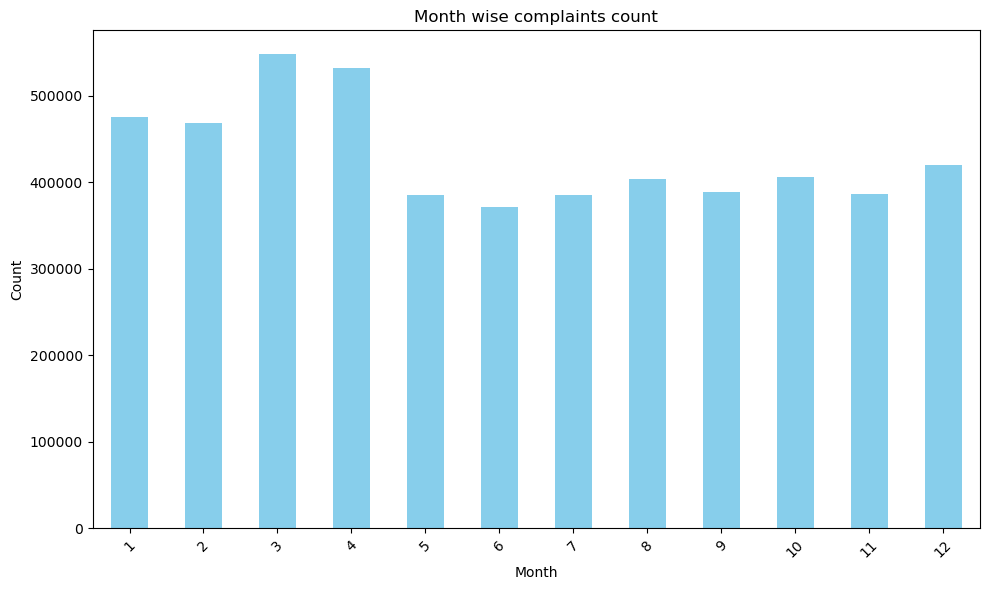

In [15]:
plt.figure(figsize=(10, 6))
df['month'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Month wise complaints count')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### <font color = 'blue'> -- no significant pattern observed w.r.t to months

## <font color = 'orange'> Plotting frequency of years

In [16]:
df['year'].value_counts().sort_index()

2011       2536
2012      72372
2013     108215
2014     153008
2015     168437
2016     191414
2017     242854
2018     257220
2019     277298
2020     444294
2021     496004
2022     800359
2023    1292154
2024     661617
Name: year, dtype: int64

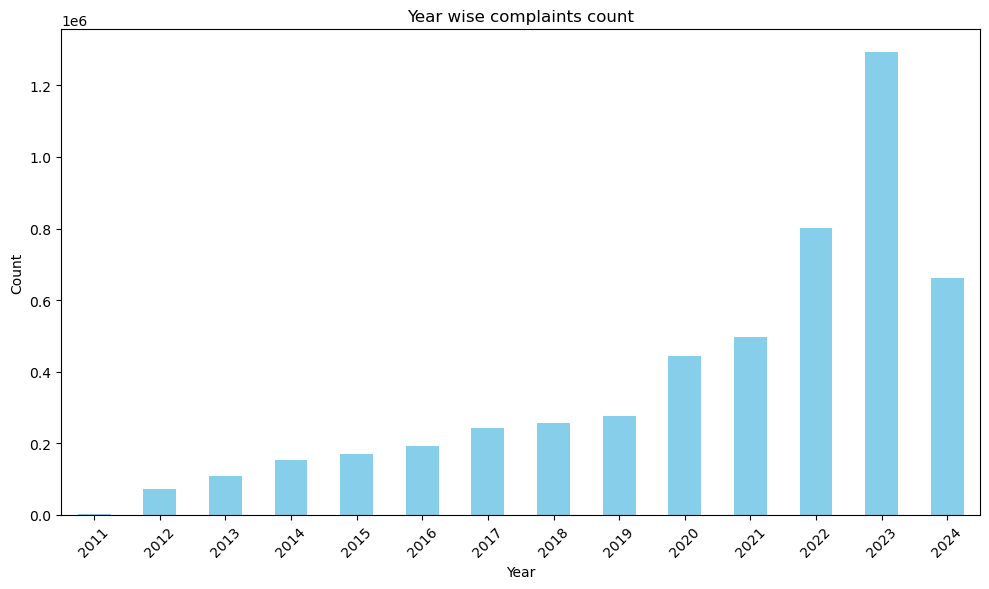

In [17]:

plt.figure(figsize=(10, 6))
df['year'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Year wise complaints count')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### <font color = 'blue'> -- the volume of complaints has increased exponentially over the years

## <font color = 'orange'> Plotting company wise complaints count

In [17]:
df.Company.nunique()

7204

In [18]:
df.Company.value_counts()[:15]

EQUIFAX, INC.                             1075067
TRANSUNION INTERMEDIATE HOLDINGS, INC.     994517
Experian Information Solutions Inc.        904819
BANK OF AMERICA, NATIONAL ASSOCIATION      140335
WELLS FARGO & COMPANY                      128430
JPMORGAN CHASE & CO.                       119144
CAPITAL ONE FINANCIAL CORPORATION           98904
CITIBANK, N.A.                              94213
SYNCHRONY FINANCIAL                         51041
Navient Solutions, LLC.                     39604
U.S. BANCORP                                36180
AMERICAN EXPRESS COMPANY                    35241
Ocwen Financial Corporation                 34814
DISCOVER BANK                               29224
PORTFOLIO RECOVERY ASSOCIATES INC           27697
Name: Company, dtype: int64

In [19]:
df.Company.value_counts(normalize = True)[:15]

EQUIFAX, INC.                             0.208033
TRANSUNION INTERMEDIATE HOLDINGS, INC.    0.192446
Experian Information Solutions Inc.       0.175088
BANK OF AMERICA, NATIONAL ASSOCIATION     0.027156
WELLS FARGO & COMPANY                     0.024852
JPMORGAN CHASE & CO.                      0.023055
CAPITAL ONE FINANCIAL CORPORATION         0.019139
CITIBANK, N.A.                            0.018231
SYNCHRONY FINANCIAL                       0.009877
Navient Solutions, LLC.                   0.007664
U.S. BANCORP                              0.007001
AMERICAN EXPRESS COMPANY                  0.006819
Ocwen Financial Corporation               0.006737
DISCOVER BANK                             0.005655
PORTFOLIO RECOVERY ASSOCIATES INC         0.005360
Name: Company, dtype: float64

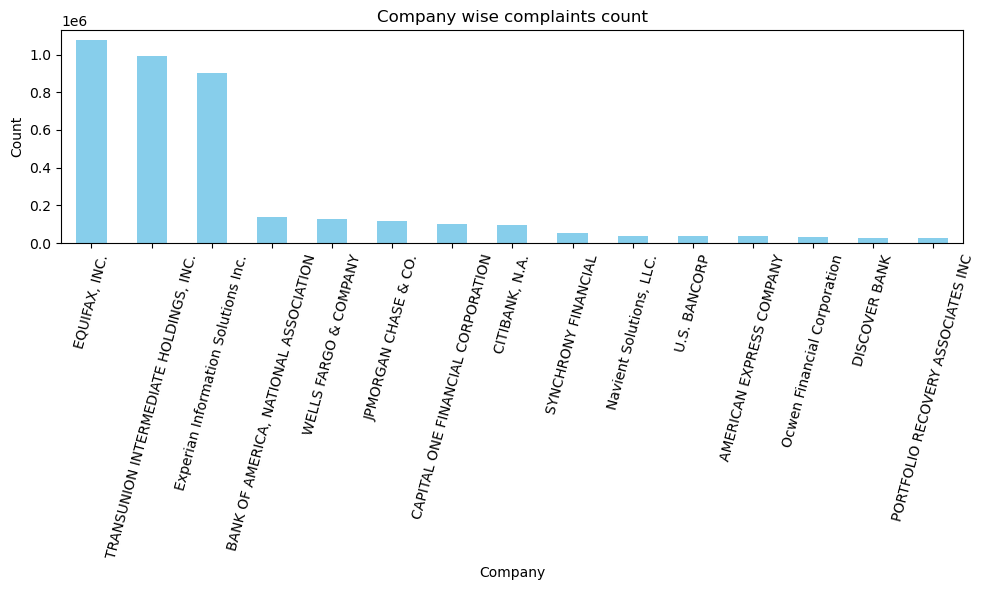

In [20]:

plt.figure(figsize=(10, 6))
df['Company'].value_counts()[:15].plot(kind='bar', color='skyblue')
plt.title('Company wise complaints count')
plt.xlabel('Company')
plt.ylabel('Count')
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()

### <font color = 'blue'> -- compaints are received on 7204 companies
### <font color = 'blue'> --  top 3 companies hold almost 56 % of the complaints

## <font color = 'orange'> Plotting ZIP code wise complaints count

In [21]:
df['ZIP code'].nunique()

33632

In [22]:
df['ZIP code'].value_counts()[:10]

XXXXX    119502
30349      9506
19143      8038
33025      7195
33311      6634
77449      6547
35405      6496
604XX      6492
19120      6046
30331      5964
Name: ZIP code, dtype: int64

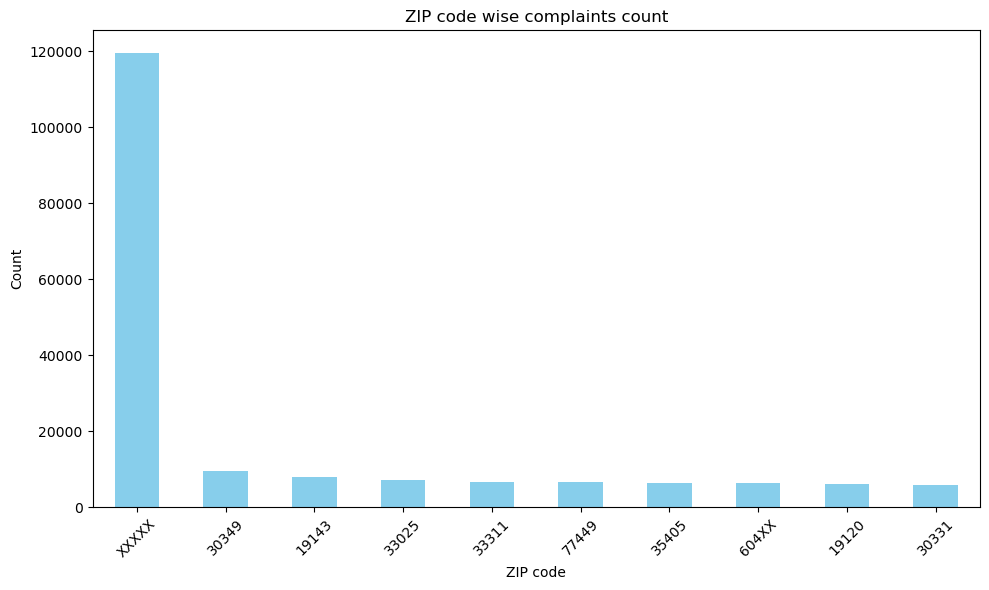

In [23]:

plt.figure(figsize=(10, 6))
df['ZIP code'].value_counts()[:10].plot(kind='bar', color='skyblue')
plt.title('ZIP code wise complaints count')
plt.xlabel('ZIP code')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### <font color = 'blue'> -- complaints are received from 33632 zip codes
### <font color = 'blue'> -- there is specific pattern observed w.r.t to zip codes

## <font color = 'orange'> Plotting state wise complaints count

In [24]:
df['State'].nunique()

63

In [25]:
df['State'].value_counts()[:10]

FL    619361
CA    589948
TX    550630
GA    354237
NY    331769
PA    244915
IL    215559
NJ    174698
NC    168306
MD    135396
Name: State, dtype: int64

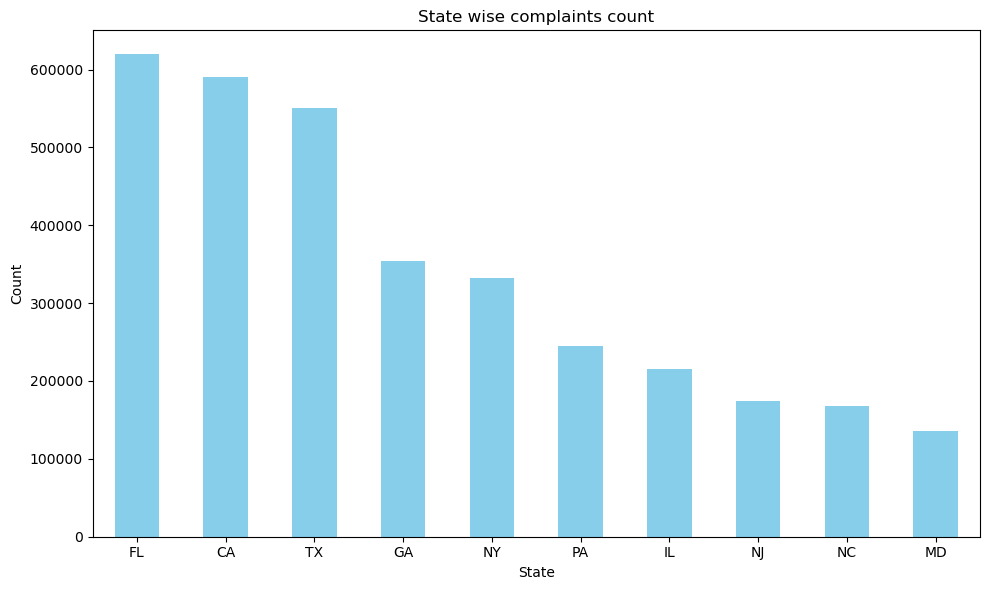

In [26]:

plt.figure(figsize=(10, 6))
df['State'].value_counts()[:10].plot(kind='bar', color='skyblue')
plt.title('State wise complaints count')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### <font color = 'blue'> -- complaints are recieved across 63 states
### <font color = 'blue'> -- there is no specific pattern observed w.r.t to states

## <font color = 'orange'> Plotting Product wise complaints count

In [27]:
df['Product'].nunique()

21

In [28]:
df['Product'].value_counts()[:10]

Credit reporting, credit repair services, or other personal consumer reports    2163878
Credit reporting or other personal consumer reports                              959581
Debt collection                                                                  567007
Mortgage                                                                         397811
Checking or savings account                                                      212459
Credit card or prepaid card                                                      206373
Credit reporting                                                                 140429
Credit card                                                                      132976
Student loan                                                                      88116
Bank account or service                                                           86205
Name: Product, dtype: int64

In [29]:
df['Product'].value_counts(normalize = True)[:10]

Credit reporting, credit repair services, or other personal consumer reports    0.418725
Credit reporting or other personal consumer reports                             0.185685
Debt collection                                                                 0.109720
Mortgage                                                                        0.076979
Checking or savings account                                                     0.041112
Credit card or prepaid card                                                     0.039935
Credit reporting                                                                0.027174
Credit card                                                                     0.025732
Student loan                                                                    0.017051
Bank account or service                                                         0.016681
Name: Product, dtype: float64

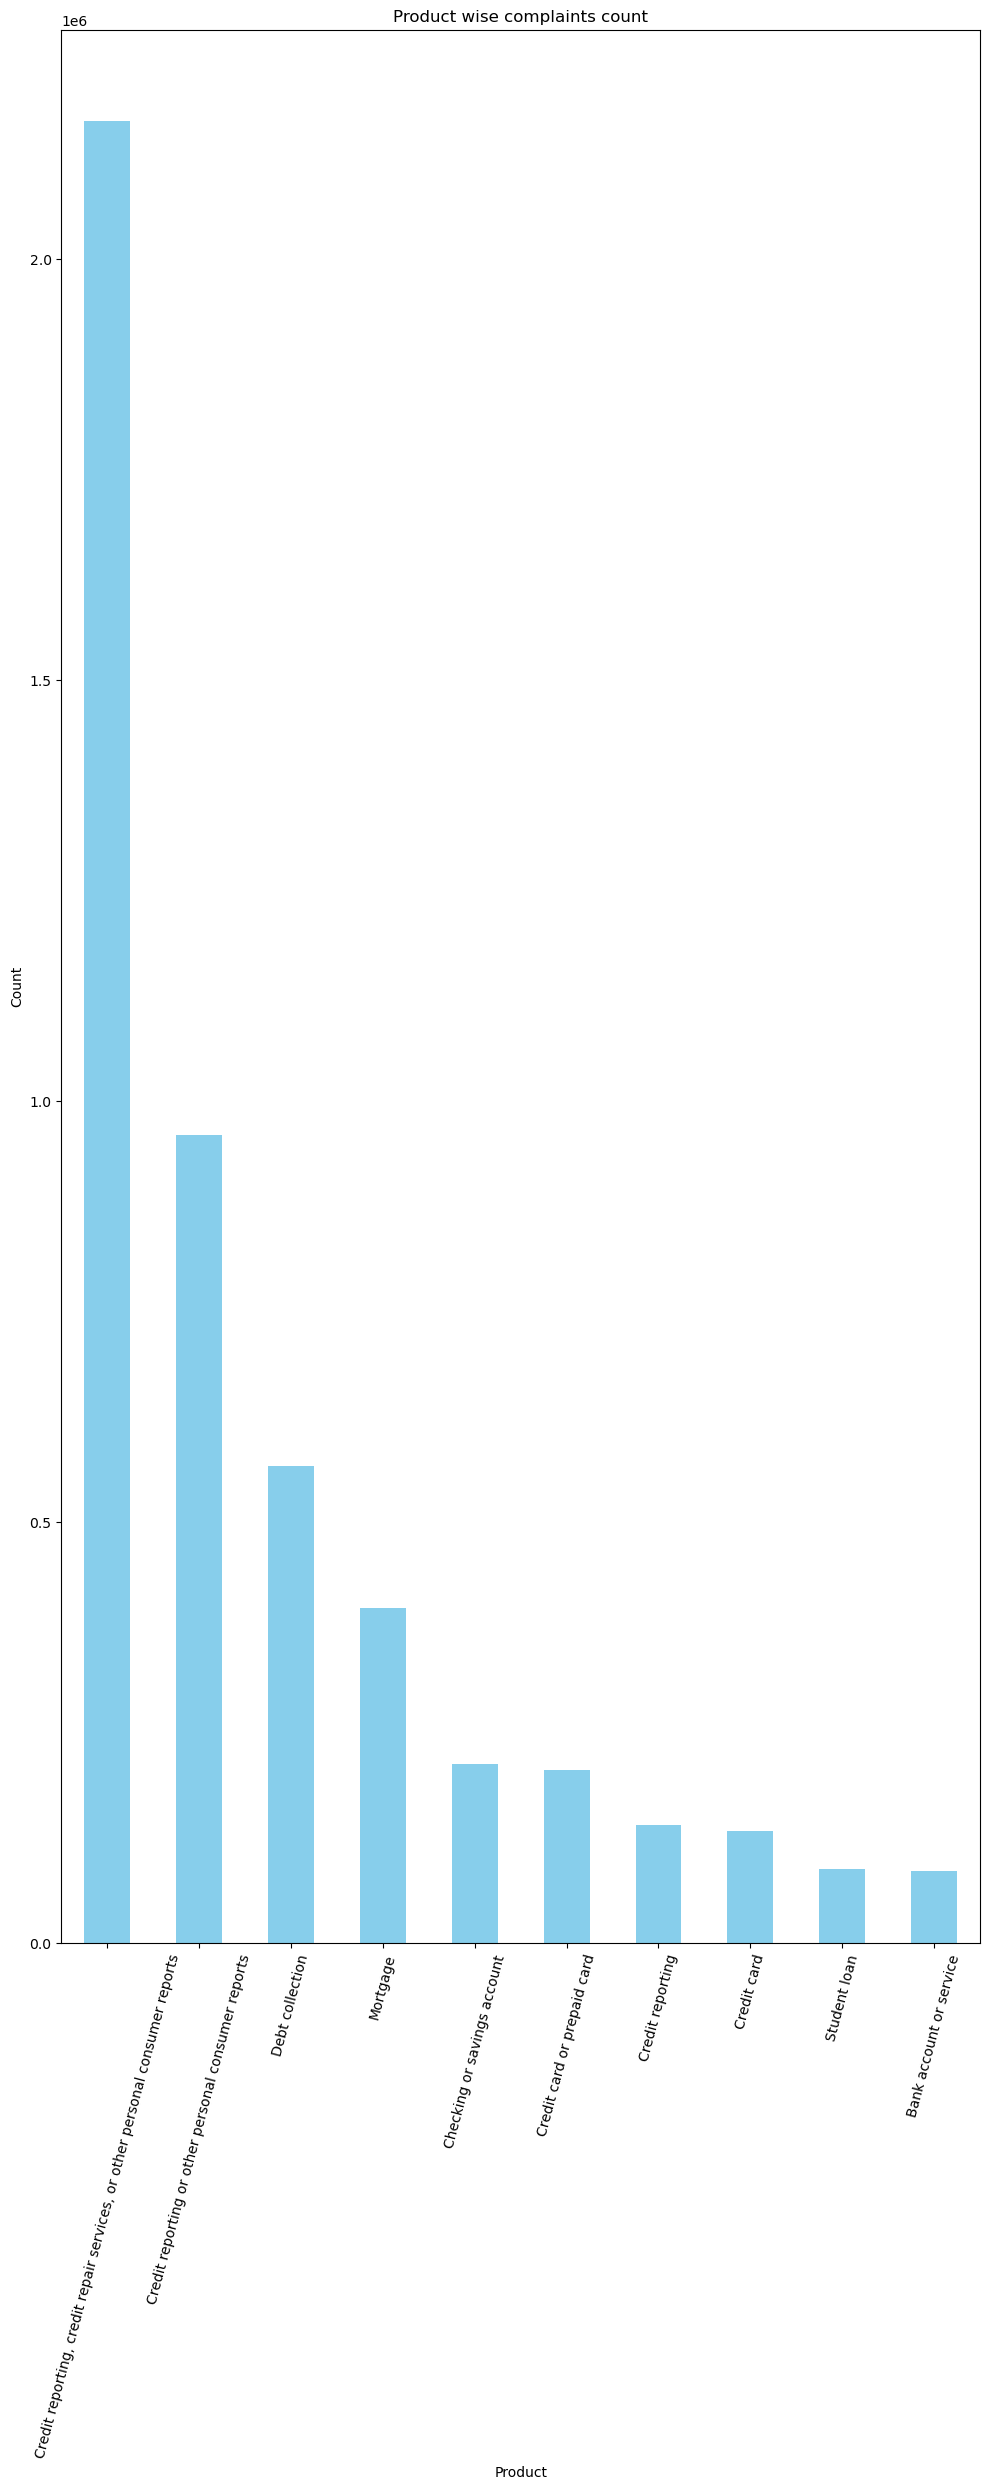

In [30]:
plt.figure(figsize=(10, 25))
df['Product'].value_counts()[:10].plot(kind='bar', color='skyblue')
plt.title('Product wise complaints count')
plt.xlabel('Product')
plt.ylabel('Count')
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()

### <font color = 'blue'> -- there are 21 unique issues, almost 60% of the issues are related to credit card only

## <font color = 'orange'> Plotting Sub-product wise complaints count

In [31]:
df['Sub-product'].nunique()

86

In [33]:
df['Sub-product'].value_counts()[:10]

Credit reporting                              3097097
Checking account                               228291
General-purpose credit card or charge card     197957
I do not know                                  134083
Other debt                                     109336
Conventional home mortgage                     103704
Credit card debt                                97493
Other mortgage                                  86631
Conventional fixed mortgage                     70607
Medical debt                                    58338
Name: Sub-product, dtype: int64

In [34]:
df['Sub-product'].value_counts(normalize = True)[:10]

Credit reporting                              0.627897
Checking account                              0.046283
General-purpose credit card or charge card    0.040133
I do not know                                 0.027184
Other debt                                    0.022166
Conventional home mortgage                    0.021025
Credit card debt                              0.019765
Other mortgage                                0.017563
Conventional fixed mortgage                   0.014315
Medical debt                                  0.011827
Name: Sub-product, dtype: float64

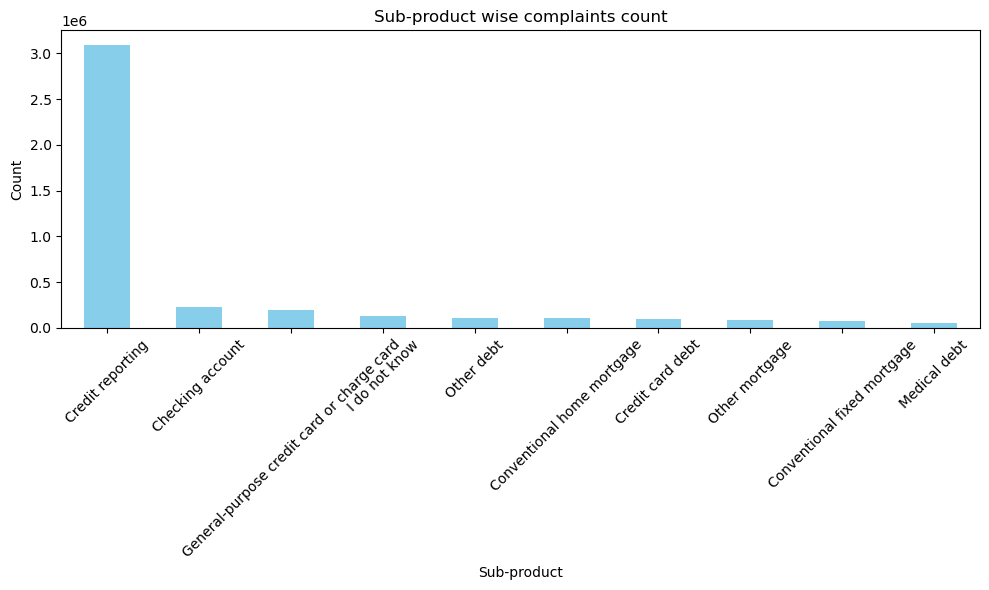

In [35]:
plt.figure(figsize=(10, 6))
df['Sub-product'].value_counts()[:10].plot(kind='bar', color='skyblue')
plt.title('Sub-product wise complaints count')
plt.xlabel('Sub-product')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### <font color = 'blue'> -- there are 86 types of sub products  
### <font color = 'blue'> -- 62 % of issues are w.r.t to credit reporting only

## <font color = 'orange'> Plotting Tags wise complaints count

In [36]:
df['Tags'].nunique()

3

In [37]:
df['Tags'].value_counts()

Servicemember                    284393
Older American                   159127
Older American, Servicemember     39330
Name: Tags, dtype: int64

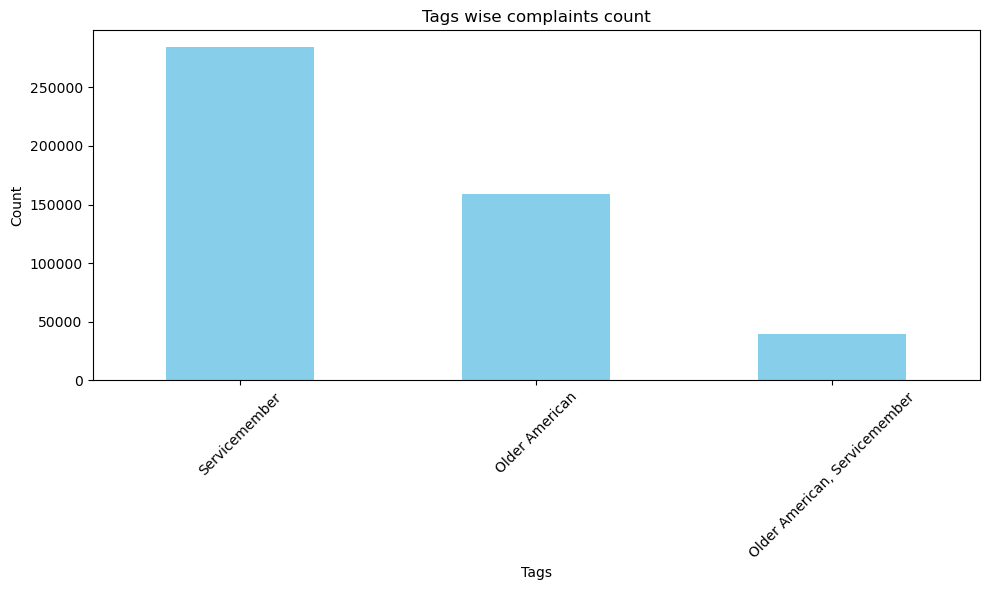

In [38]:
plt.figure(figsize=(10, 6))
df['Tags'].value_counts()[:10].plot(kind='bar', color='skyblue')
plt.title('Tags wise complaints count')
plt.xlabel('Tags')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## <font color = 'orange'> Plotting 'Consumer consent provided?	' wise complaints count

In [39]:
df['Consumer consent provided?'].nunique()

4

In [40]:
df['Consumer consent provided?'].value_counts()

Consent not provided    2064644
Consent provided        1817757
Other                    249612
Consent withdrawn          8957
Name: Consumer consent provided?, dtype: int64

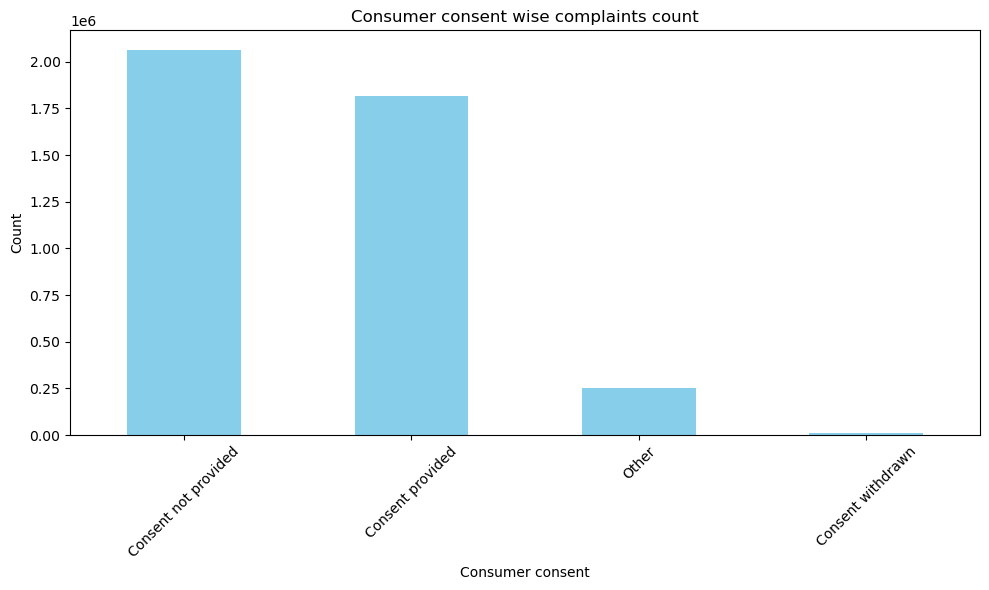

In [41]:
plt.figure(figsize=(10, 6))
df['Consumer consent provided?'].value_counts()[:10].plot(kind='bar', color='skyblue')
plt.title('Consumer consent wise complaints count')
plt.xlabel('Consumer consent')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## <font color = 'orange'> Plotting Issue wise complaint count

In [42]:
df['Issue'].nunique()

178

In [43]:
df['Issue'].value_counts()[:10]

Incorrect information on your report                                                1504940
Improper use of your report                                                          799797
Problem with a credit reporting company's investigation into an existing problem     589336
Attempts to collect debt not owed                                                    211699
Problem with a company's investigation into an existing problem                      204610
Managing an account                                                                  129205
Loan modification,collection,foreclosure                                             112306
Incorrect information on credit report                                               102684
Written notification about debt                                                       96690
Trouble during payment process                                                        81136
Name: Issue, dtype: int64

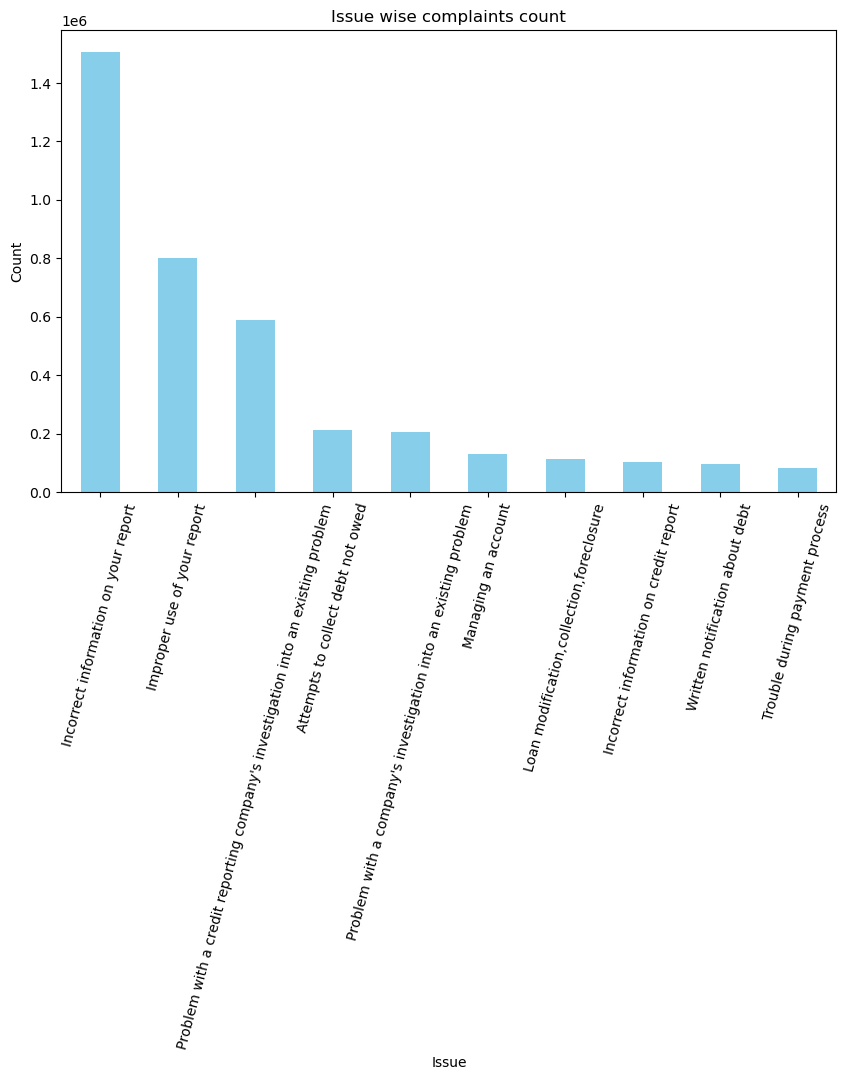

In [50]:
plt.figure(figsize=(10, 6))
df['Issue'].value_counts()[:10].plot(kind='bar', color='skyblue')
plt.title('Issue wise complaints count')
plt.xlabel('Issue')
plt.ylabel('Count')
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()

## <font color = 'orange'> plotting Sub-issue wise complaint count

In [44]:
df['Sub-issue'].nunique()

272

In [45]:
df['Sub-issue'].value_counts()[:10]

Information belongs to someone else                         997464
Reporting company used your report improperly               523894
Their investigation did not fix an error on your report     455688
Credit inquiries on your report that you don't recognize    271091
Account information incorrect                               181711
Investigation took more than 30 days                        172867
Account status incorrect                                    160570
Was not notified of investigation status or results         125884
Debt is not yours                                           107665
Personal information incorrect                               90099
Name: Sub-issue, dtype: int64

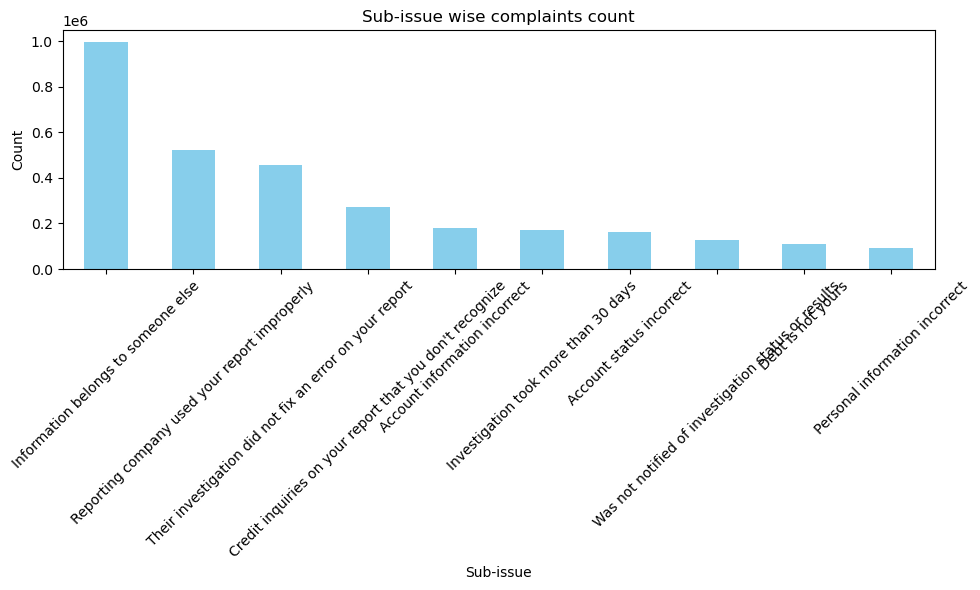

In [46]:
plt.figure(figsize=(10, 6))
df['Sub-issue'].value_counts()[:10].plot(kind='bar', color='skyblue')
plt.title('Sub-issue wise complaints count')
plt.xlabel('Sub-issue')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### <font color = 'blue'> -- there is significant pattern seen

## <font color = 'orange'> plotting 'Submitted via' complaint count

In [47]:
df['Submitted via'].nunique()

7

In [48]:
df['Submitted via'].value_counts()

Web             4617033
Referral         248302
Phone            180479
Postal mail       94644
Fax               25658
Web Referral       1241
Email               425
Name: Submitted via, dtype: int64

In [49]:
df['Submitted via'].value_counts(normalize = True)

Web             0.893426
Referral        0.048048
Phone           0.034924
Postal mail     0.018314
Fax             0.004965
Web Referral    0.000240
Email           0.000082
Name: Submitted via, dtype: float64

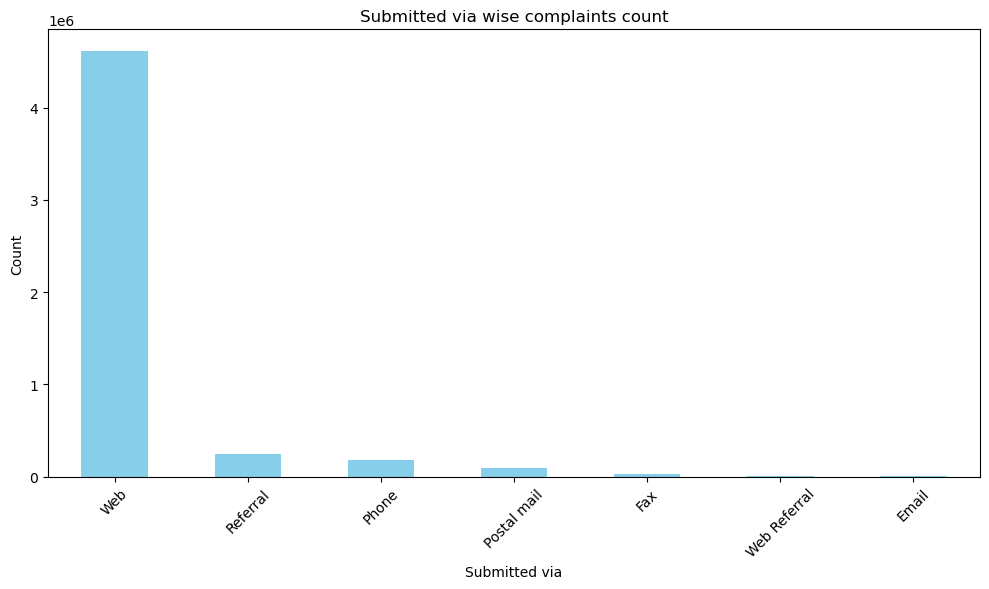

In [50]:
plt.figure(figsize=(10, 6))
df['Submitted via'].value_counts()[:10].plot(kind='bar', color='skyblue')
plt.title('Submitted via wise complaints count')
plt.xlabel('Submitted via')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### <font color = 'blue'> -- there are 7 modes of submission of complaints
### <font color = 'blue'> -- almost 90% of complaints are received in web mode only

## <font color = 'orange'> plotting 'Company response to consumer' wise complaints count

In [51]:
df['Company response to consumer'].nunique()

8

In [52]:
df['Company response to consumer'].value_counts()

Closed with explanation            3445821
Closed with non-monetary relief    1297585
In progress                         218783
Closed with monetary relief         153316
Closed without relief                17868
Closed                               17611
Untimely response                    11480
Closed with relief                    5304
Name: Company response to consumer, dtype: int64

In [53]:
df['Company response to consumer'].value_counts(normalize = True)

Closed with explanation            0.666791
Closed with non-monetary relief    0.251092
In progress                        0.042336
Closed with monetary relief        0.029668
Closed without relief              0.003458
Closed                             0.003408
Untimely response                  0.002221
Closed with relief                 0.001026
Name: Company response to consumer, dtype: float64

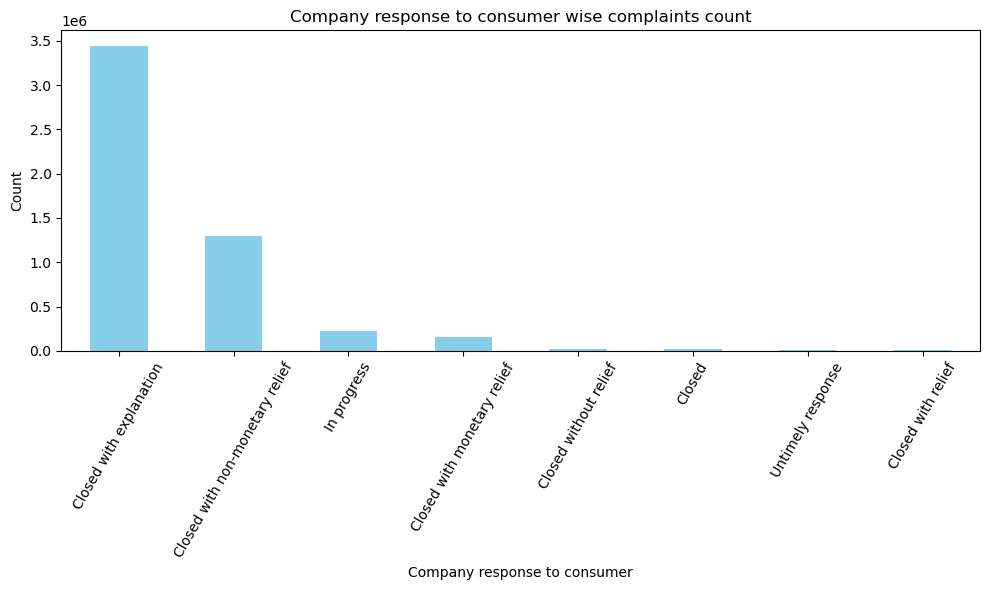

In [54]:
plt.figure(figsize=(10, 6))
df['Company response to consumer'].value_counts()[:10].plot(kind='bar', color='skyblue')
plt.title('Company response to consumer wise complaints count')
plt.xlabel('Company response to consumer')
plt.ylabel('Count')
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

### <font color = 'blue'> -- almost all complaints are closed, with only 0.04% complaints 'in progress'

## <font color = 'orange'> plotting 'Timely response?' wise complaints count

In [55]:
df['Timely response?'].nunique()

2

In [56]:
df['Timely response?'].value_counts()

Yes    5109230
No       58552
Name: Timely response?, dtype: int64

In [57]:
df['Timely response?'].value_counts(normalize = True)

Yes    0.98867
No     0.01133
Name: Timely response?, dtype: float64

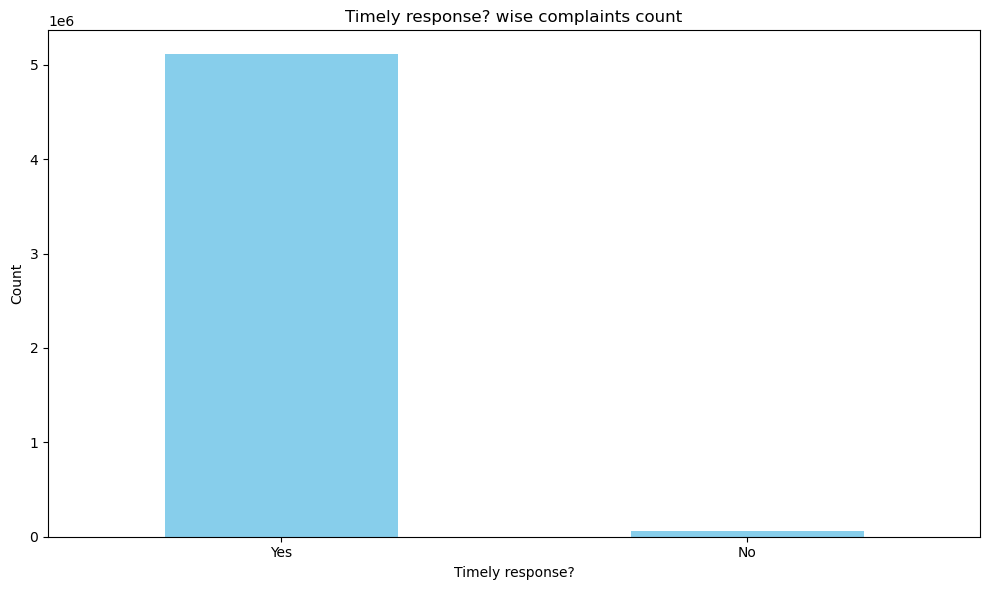

In [65]:

plt.figure(figsize=(10, 6))
df['Timely response?'].value_counts()[:10].plot(kind='bar', color='skyblue')
plt.title('Timely response? wise complaints count')
plt.xlabel('Timely response?')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### <font color = 'blue'> -- almost 99 % of the complaints are responded in time

## <font color = 'orange'> plotting 'Consumer disputed?' wise complaints count

In [58]:
df['Consumer disputed?'].nunique()

2

In [59]:
df['Consumer disputed?'].value_counts()

No     619938
Yes    148378
Name: Consumer disputed?, dtype: int64

In [60]:
df['Consumer disputed?'].value_counts(normalize = True)

No     0.806879
Yes    0.193121
Name: Consumer disputed?, dtype: float64

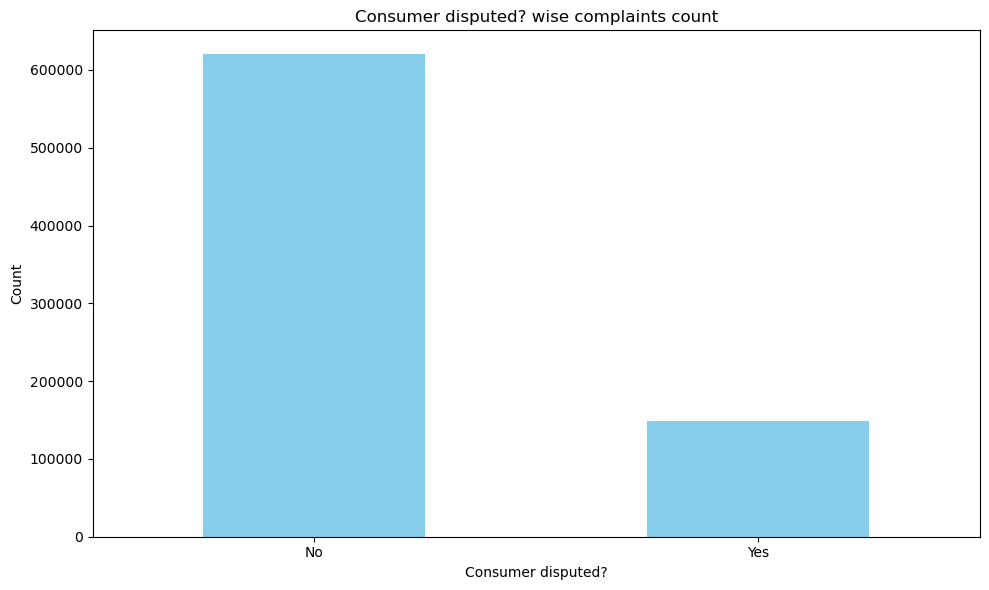

In [61]:
plt.figure(figsize=(10, 6))
df['Consumer disputed?'].value_counts()[:10].plot(kind='bar', color='skyblue')
plt.title('Consumer disputed? wise complaints count')
plt.xlabel('Consumer disputed?')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### <font color = 'blue'> -- almost 80% of the complaints have no disputes escalated

# <font color = 'red'> **Deeper analysis**  <font color = 'white'> (chosen 5 questions of choice)

## <font color = 'yellow'> 1. any patterns to be seen w.r.t to 3 companies

In [62]:
df['Company'].value_counts()[:10]

EQUIFAX, INC.                             1075067
TRANSUNION INTERMEDIATE HOLDINGS, INC.     994517
Experian Information Solutions Inc.        904819
BANK OF AMERICA, NATIONAL ASSOCIATION      140335
WELLS FARGO & COMPANY                      128430
JPMORGAN CHASE & CO.                       119144
CAPITAL ONE FINANCIAL CORPORATION           98904
CITIBANK, N.A.                              94213
SYNCHRONY FINANCIAL                         51041
Navient Solutions, LLC.                     39604
Name: Company, dtype: int64

In [63]:
df1 = df[df.Company.isin(['EQUIFAX, INC.', 'TRANSUNION INTERMEDIATE HOLDINGS, INC.', 'Experian Information Solutions Inc.'])]

In [64]:
df1.shape

(2974403, 20)

### <font color = 'blue'> -- almost 30 lakh complaints out of 51 lakh complaints are on these 3 companies only

In [65]:
df1.head(2)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,year,month
0,2024-01-24,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account information incorrect,NaN,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",FL,33578,NaN,Consent not provided,Web,2024-01-24,Closed with explanation,Yes,NaN,8205544,2024,1
4,2024-01-26,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,"The companies, along with the credit reporting...",NaN,"EQUIFAX, INC.",NC,28804,NaN,Consent provided,Web,2024-01-26,Closed with non-monetary relief,Yes,NaN,8232435,2024,1


In [66]:
df1['Date received'].min(), df1['Date received'].max(),

(Timestamp('2012-10-14 00:00:00'), Timestamp('2024-05-06 00:00:00'))

### <font color = 'blue'> -- the span of complaints are from 2012 to 2024 

In [68]:
df1.month.value_counts(normalize = True).sort_index()

1     0.092519
2     0.092578
3     0.110690
4     0.111431
5     0.072070
6     0.067469
7     0.070596
8     0.074632
9     0.073238
10    0.076301
11    0.074807
12    0.083670
Name: month, dtype: float64

### <font color = 'blue'> -- in general there is no month with significant hike in complaints, but a slight anomaly of increased complaints seen in month of march and april 

In [69]:
df1.year.value_counts(normalize = True).sort_index()

2012    0.000609
2013    0.004576
2014    0.009497
2015    0.011094
2016    0.014425
2017    0.025042
2018    0.029697
2019    0.039267
2020    0.084960
2021    0.085901
2022    0.184650
2023    0.329058
2024    0.181224
Name: year, dtype: float64

### <font color = 'blue'> -- there is constant increase in complaints over years

In [70]:
df1['Sub-product'].value_counts(normalize = True)[:10]

Credit reporting                              0.974777
General-purpose credit card or charge card    0.005597
I do not know                                 0.005196
Credit card debt                              0.004021
Other personal consumer report                0.003488
Other debt                                    0.002955
Medical debt                                  0.000982
Credit repair services                        0.000731
Auto debt                                     0.000571
Loan                                          0.000239
Name: Sub-product, dtype: float64

### <font color = 'blue'> -- 97% complaints are on 'credit reporting'

In [71]:
df1['State'].value_counts(normalize = True)[:10]

FL    0.135800
TX    0.122816
CA    0.101758
GA    0.078635
NY    0.062642
PA    0.054549
IL    0.044354
NC    0.034835
NJ    0.031655
MD    0.024915
Name: State, dtype: float64

### <font color = 'blue'> -- states of FL, TX, CA have seen 35% of complaints among 63 states

In [72]:
df1['Timely response?'].value_counts(normalize = True)[:10]

Yes    0.999276
No     0.000724
Name: Timely response?, dtype: float64

### <font color = 'blue'> -- almost 99.9% of complaints are responded in time

## <font color = 'yellow'> 2. any pattern in 'monetary reliefs' (Company response to consumer)

In [73]:
df['Company response to consumer'].value_counts()[:10]

Closed with explanation            3445821
Closed with non-monetary relief    1297585
In progress                         218783
Closed with monetary relief         153316
Closed without relief                17868
Closed                               17611
Untimely response                    11480
Closed with relief                    5304
Name: Company response to consumer, dtype: int64

In [74]:
df2 = df[df['Company response to consumer'].isin(['Closed with monetary relief'])]

In [75]:
df2.shape

(153316, 20)

### <font color = 'blue'> -- almost 1.5 lakh complaints received monetary relief among 51 lakh complaints

In [76]:
df2['Company'].nunique()

1766

### <font color = 'blue'> -- complaints on 1766 companies received monetary reliefs

In [77]:
df2['Company'].value_counts(normalize = True)[:10]

BANK OF AMERICA, NATIONAL ASSOCIATION    0.157035
CITIBANK, N.A.                           0.105214
JPMORGAN CHASE & CO.                     0.091119
WELLS FARGO & COMPANY                    0.069132
CAPITAL ONE FINANCIAL CORPORATION        0.056472
SYNCHRONY FINANCIAL                      0.055415
AMERICAN EXPRESS COMPANY                 0.037465
Bread Financial Holdings, Inc.           0.034706
TD BANK US HOLDING COMPANY               0.030284
U.S. BANCORP                             0.027805
Name: Company, dtype: float64

### <font color = 'blue'> -- complaints on top 3 companies make 35 % of the monetary reliefs
### <font color = 'blue'> -- it is to be noted that these 3 companies do not make the top 3 in general complaints

## <font color = 'yellow'> 3. any pattern in Untimely response

In [78]:
df['Timely response?'].unique()

array(['Yes', 'No'], dtype=object)

In [79]:
df3 = df[df['Timely response?'].isin(['No'])]

In [80]:
df3.shape

(58552, 20)

In [81]:
df3['Consumer disputed?'].value_counts(normalize = True)[:10]

No     0.879648
Yes    0.120352
Name: Consumer disputed?, dtype: float64

In [82]:
df3['Company response to consumer'].value_counts(normalize = True)[:10]

Closed with explanation            0.677056
Untimely response                  0.196065
Closed with non-monetary relief    0.048009
Closed with monetary relief        0.037198
Closed                             0.029734
Closed without relief              0.008813
Closed with relief                 0.003125
Name: Company response to consumer, dtype: float64

### <font color = 'blue'> -- there is no specific significant detail observed

## <font color = 'yellow'> 4. any pattern in 'in progress' (Company response to consumer)

In [83]:
df['Company response to consumer'].unique()

array(['Closed with explanation', 'Closed with non-monetary relief',
       'Closed with monetary relief', 'In progress', 'Untimely response',
       nan, 'Closed without relief', 'Closed', 'Closed with relief'],
      dtype=object)

In [84]:
df4 = df[df['Company response to consumer'].isin(['In progress'])]

In [85]:
df4.shape

(218783, 20)

### <font color = 'blue'> -- almost 2.2 lakh complaints still 'in progress'

In [86]:
df4['month'].value_counts(normalize = True).sort_index()

1     0.011395
2     0.041164
3     0.233464
4     0.635104
5     0.078854
9     0.000005
10    0.000005
12    0.000009
Name: month, dtype: float64

### <font color = 'blue'> -- the complaints received in the month of APRIL constitutes 63.5% of the 'in progress' complaints, followed by MARCH

In [87]:
df4['year'].value_counts(normalize = True).sort_index()

2019    0.000005
2021    0.000005
2023    0.000009
2024    0.999982
Name: year, dtype: float64

### <font color = 'blue'> -- cases of 2019, 2021, 2023, 2024 only have complaints 'in progress'
### <font color = 'blue'> -- among them 2024 itself constitutes 99.99% of complaints

In [88]:
df4['Company'].value_counts(normalize = True)[:10]

Experian Information Solutions Inc.       0.360037
EQUIFAX, INC.                             0.307880
TRANSUNION INTERMEDIATE HOLDINGS, INC.    0.285936
NAVY FEDERAL CREDIT UNION                 0.005151
BANK OF AMERICA, NATIONAL ASSOCIATION     0.004520
MOHELA                                    0.003346
CAPITAL ONE FINANCIAL CORPORATION         0.002614
ENCORE CAPITAL GROUP INC.                 0.002249
SYNCHRONY FINANCIAL                       0.001979
Kriya Capital, LLC                        0.001668
Name: Company, dtype: float64

### <font color = 'blue'> -- top 3 companies 'Experian Information Solutions Inc.', 'EQUIFAX, INC.', 'TRANSUNION INTERMEDIATE HOLDINGS, INC.' constitute 94 % of the 'in progress' complaints

## <font color = 'yellow'> 5. any pattern in consumer disputed as yes

In [89]:
df5 = df[df['Consumer disputed?'].isin(['Yes'])]

In [90]:
df5.shape

(148378, 20)

In [91]:
df5['Company'].value_counts(normalize = True)[:10]

BANK OF AMERICA, NATIONAL ASSOCIATION     0.096962
WELLS FARGO & COMPANY                     0.078967
EQUIFAX, INC.                             0.067928
JPMORGAN CHASE & CO.                      0.064181
CITIBANK, N.A.                            0.045135
Ocwen Financial Corporation               0.038543
TRANSUNION INTERMEDIATE HOLDINGS, INC.    0.037998
Experian Information Solutions Inc.       0.035922
NATIONSTAR MORTGAGE LLC                   0.025327
CAPITAL ONE FINANCIAL CORPORATION         0.024633
Name: Company, dtype: float64

In [92]:
df5['Sub-product'].value_counts(normalize = True)[:10]

Other mortgage                            0.160287
Conventional fixed mortgage               0.159979
Checking account                          0.099362
Other (i.e. phone, health club, etc.)     0.067236
Conventional adjustable mortgage (ARM)    0.060990
FHA mortgage                              0.052599
Credit card                               0.048973
I do not know                             0.048152
Non-federal student loan                  0.044833
Medical                                   0.039258
Name: Sub-product, dtype: float64

### <font color = 'blue'> -- almost 30% of the issues disputed are falling in the sub-product of 'Other mortgage', 'Conventional fixed mortgage'
### <font color = 'blue'> -- it is to be noted that most of the sub-product in general are of 'credit card', but here above 2 constitute more

In [93]:
df5['Sub-issue'].value_counts(normalize = True)[:10]

Debt is not mine                        0.120472
Account status                          0.089502
Information is not mine                 0.086628
Not given enough info to verify debt    0.078652
Debt was paid                           0.052993
Account terms                           0.035215
Attempted to collect wrong amount       0.034834
Right to dispute notice not received    0.034282
Public record                           0.030151
Frequent or repeated calls              0.028229
Name: Sub-issue, dtype: float64

### <font color = 'blue'> -- there is no specific significant pattern observed here

# <font color = 'red'> **------------------------------------------END-----------------------------------------------------**

# 2) Given an unsorted array of integers, find the length of the longest continuous increasing subsequence (subarray). 

In [95]:
def largestcontinous(nums):
    max_length = 1
    current_length = 1
    for i in range(1, len(nums)):
        if nums[i] > nums[i - 1]:
            current_length += 1
        else:
            max_length = max(max_length, current_length)
            current_length = 1
    
    return max(max_length, current_length)

In [96]:
nums=[1,3,5,4,7]
largestcontinous(nums)

3

# 3) Given a list of non negative integers, arrange them such that they form the largest number.

In [97]:
from functools import cmp_to_key
def largestNumber(nums):
    def compare(a, b):
        return int(b + a) - int(a + b)
    
    nums = sorted(map(str, nums), key=cmp_to_key(compare))
    return str(int("".join(nums)))

In [98]:
largestNumber([10, 2])

'210'

# 4)Store all the "servlet-name", and "servlet-class" to a csv file from the attached sample_json.json file using Pytho

In [2]:
import json
import csv

# Load JSON data
with open('DT A1 sample_json.json') as f:
    data = json.load(f)

In [4]:
servlet_data = data['web-app']['servlet']

# Write data to CSV
with open('servlet_data.csv', 'w', newline='') as csvfile:
    fieldnames = ['servlet-name', 'servlet-class']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    for servlet in servlet_data:
        writer.writerow({'servlet-name': servlet['servlet-name'], 'servlet-class': servlet['servlet-class']})

print("CSV file has been created successfully!")

CSV file has been created successfully!
